### Actividad 2:

Bibliotecas



In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as skl

In [2]:
def cargar_base_datos(directorio, separador, muestra=False, columnas=None, archivo='Gaia_NaN.csv', nrows=None):
    import pandas as pd
    import os

    ruta_archivo = os.path.join(directorio, archivo)

    if muestra and columnas is None:
        columnas = pd.read_csv(ruta_archivo, nrows=0, sep=separador).columns.tolist()

    if columnas is not None and not isinstance(columnas, list):
        raise TypeError("El argumento 'columnas' debe ser una lista")

    if muestra:
        if nrows is None:
            nrows = 10000
        df = pd.read_csv(ruta_archivo, usecols=columnas, nrows=nrows, sep=separador)
    else:
        df = pd.read_csv(ruta_archivo, usecols=columnas, sep=separador)

    return df

# cargar_base_datos(r'C:\Users\Sebastian\Downloads', muestra=True)
data = cargar_base_datos('C:\\Users\\Sebastian\\Downloads\\miniproyecto-1', ';', muestra=True, nrows=10000)

In [3]:
data.head()

,ID,Class,N,Amplitude,Rcs,Meanvariance,Autocor_length,SlottedA_length,Con,SmallKurtosis,...,Freq1_harmonics_rel_phase_2,Freq1_harmonics_rel_phase_3,Freq2_harmonics_rel_phase_0,Freq2_harmonics_rel_phase_1,Freq2_harmonics_rel_phase_2,Freq2_harmonics_rel_phase_3,Freq3_harmonics_rel_phase_0,Freq3_harmonics_rel_phase_1,Freq3_harmonics_rel_phase_2,Freq3_harmonics_rel_phase_3
0,2128919424960482176,MIRA_SR,25.0,1.416432,0.949482,3.0,0.000000,5.442293,0.243054,0.462373,...,268.331543,0.025528,0.304804,0.310355,1.784879,0.304804,0.011895,19.899170,-1.266215,0.931676
1,5610570552491688320,RRAB,34.0,0.443386,1.000000,1.0,0.000000,12042.752633,0.162446,0.231268,...,0.508910,0.012390,0.309458,0.519645,0.397205,0.258203,-0.962335,0.147949,-0.183573,0.284637
2,5610983311725261312,MIRA_SR,35.0,0.170099,0.875986,4.0,0.030303,137.020266,0.033964,0.208724,...,8.742769,0.040022,0.342646,0.700200,0.119849,0.368936,0.472161,0.147949,0.064528,0.089020
3,5611101307371763328,MIRA_SR,34.0,1.350858,0.999869,4.0,0.000000,23.583559,0.259476,0.593270,...,379.949707,0.000843,0.349687,0.285682,1.867060,0.349687,-0.047072,23.597900,-1.454570,0.926506
4,4654706786001108096,MIRA_SR,28.0,0.248472,0.999947,3.0,0.000000,125.486491,0.202240,0.448444,...,318.427795,0.022169,0.247451,0.578087,0.273482,0.247451,0.594605,0.147949,-0.689124,0.153349


In [27]:
def diagnostico_estadistico(df, columnas=None, media=True, desviacion=True, maximo=True, minimo=True, valores_perdidos=True):
    if columnas is None:
        columnas = df.columns.tolist()

    columnas_numericas = df[columnas].select_dtypes(include=['number']).columns.tolist()

    diagnostico = {}

    if media:
        diagnostico['Media'] = df[columnas_numericas].mean()

    if desviacion:
        diagnostico['Desviación Estándar'] = df[columnas_numericas].std()

    if maximo:
        diagnostico['Máximo'] = df[columnas_numericas].max()

    if minimo:
        diagnostico['Mínimo'] = df[columnas_numericas].min()

    if valores_perdidos:
        diagnostico['Valores Perdidos'] = df[columnas].isnull().sum()

    df_diagnostico = pd.DataFrame(diagnostico)

    return df_diagnostico

df_diagnostico = diagnostico_estadistico(data)
df_diagnostico.head()

,Media,Desviación Estándar,Máximo,Mínimo,Valores Perdidos
Amplitude,0.821475,0.440768,2.020252,0.110107,10
AndersonDarling,-0.024918,1.245174,3.139112,-3.085753,7
Autocor_length,0.001489,0.007735,0.090909,0.000000,17
Class,NaN,NaN,NaN,NaN,19
Con,0.218542,0.130628,0.782602,0.002303,15


In [32]:
from sklearn.impute import SimpleImputer

def imputar_datos(df, columnas, estrategias):
    df_imputado = df.copy()

    for columna, estrategia in zip(columnas, estrategias):
        if estrategia == 'media':
            imputer = SimpleImputer(strategy='mean')
        elif estrategia == 'mediana':
            imputer = SimpleImputer(strategy='median')
        elif estrategia == 'moda':
            imputer = SimpleImputer(strategy='most_frequent')
        else:
            raise ValueError(f"Estrategia '{estrategia}' no soportada.")

        df_imputado[[columna]] = imputer.fit_transform(df_imputado[[columna]])

    return df_imputado

df_imputado = imputar_datos(data, ['Amplitude', 'AndersonDarling', 'Autocor_length', 'Class', 'Con'], ['mediana', 'mediana', 'mediana', 'moda', 'mediana'])
df_imputado.head()

# Estas líneas son para nuevamente verificar si los valores vacíos verdaderamente se limpiaron o no
# df_imputado_diagnostico = diagnostico_estadistico(df_imputado)
# df_imputado_diagnostico.head()

,ID,Class,N,Amplitude,Rcs,Meanvariance,Autocor_length,SlottedA_length,Con,SmallKurtosis,...,Freq1_harmonics_rel_phase_2,Freq1_harmonics_rel_phase_3,Freq2_harmonics_rel_phase_0,Freq2_harmonics_rel_phase_1,Freq2_harmonics_rel_phase_2,Freq2_harmonics_rel_phase_3,Freq3_harmonics_rel_phase_0,Freq3_harmonics_rel_phase_1,Freq3_harmonics_rel_phase_2,Freq3_harmonics_rel_phase_3
0,2128919424960482176,MIRA_SR,25.0,1.416432,0.949482,3.0,0.000000,5.442293,0.243054,0.462373,...,268.331543,0.025528,0.304804,0.310355,1.784879,0.304804,0.011895,19.899170,-1.266215,0.931676
1,5610570552491688320,RRAB,34.0,0.443386,1.000000,1.0,0.000000,12042.752633,0.162446,0.231268,...,0.508910,0.012390,0.309458,0.519645,0.397205,0.258203,-0.962335,0.147949,-0.183573,0.284637
2,5610983311725261312,MIRA_SR,35.0,0.170099,0.875986,4.0,0.030303,137.020266,0.033964,0.208724,...,8.742769,0.040022,0.342646,0.700200,0.119849,0.368936,0.472161,0.147949,0.064528,0.089020
3,5611101307371763328,MIRA_SR,34.0,1.350858,0.999869,4.0,0.000000,23.583559,0.259476,0.593270,...,379.949707,0.000843,0.349687,0.285682,1.867060,0.349687,-0.047072,23.597900,-1.454570,0.926506
4,4654706786001108096,MIRA_SR,28.0,0.248472,0.999947,3.0,0.000000,125.486491,0.202240,0.448444,...,318.427795,0.022169,0.247451,0.578087,0.273482,0.247451,0.594605,0.147949,-0.689124,0.153349


c:\Users\Sebastian\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


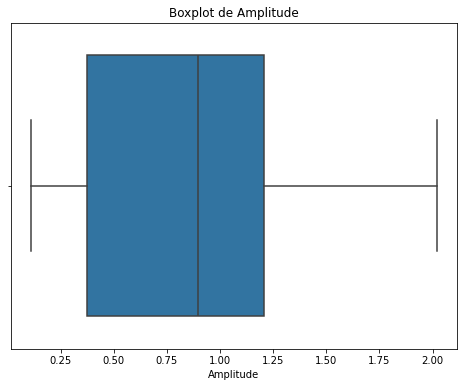

c:\Users\Sebastian\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sebastian\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


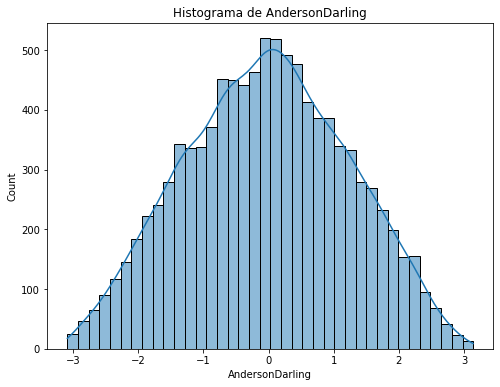

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot para Amplitude
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_imputado['Amplitude'])
plt.title('Boxplot de Amplitude')
plt.show()

# Histograma para AndersonDarling
plt.figure(figsize=(8, 6))
sns.histplot(df_imputado['AndersonDarling'], kde=True)
plt.title('Histograma de AndersonDarling')
plt.show()

c:\Users\Sebastian\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


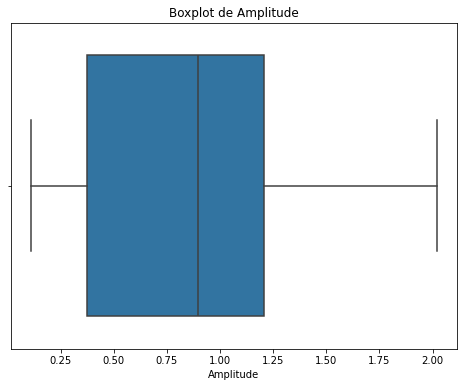

c:\Users\Sebastian\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


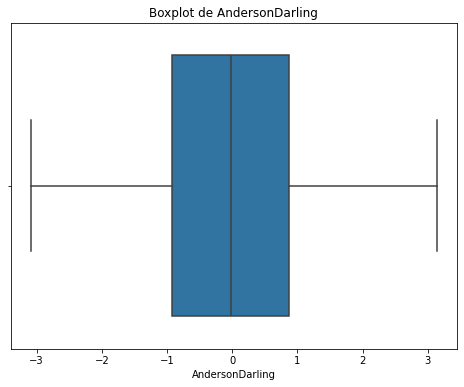

c:\Users\Sebastian\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sebastian\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


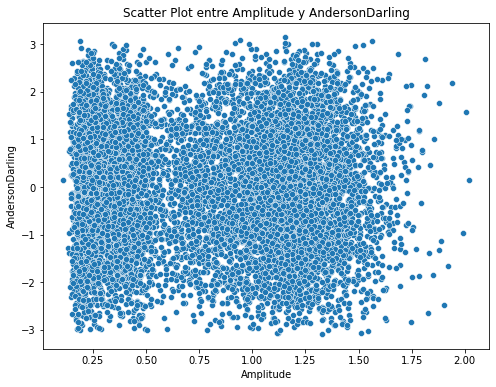

c:\Users\Sebastian\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sebastian\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


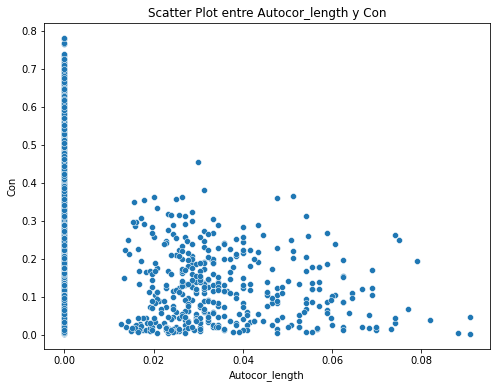

In [35]:
def crear_grafico(df, variable1, variable2=None, tipo_grafico='scatter', guardar=False, nombre_archivo='grafico.png'):
    plt.figure(figsize=(8, 6))
    
    if tipo_grafico == 'scatter' and variable2:
        sns.scatterplot(x=df[variable1], y=df[variable2])
        plt.title(f'Scatter Plot entre {variable1} y {variable2}')
    
    elif tipo_grafico == 'boxplot' and not variable2:
        sns.boxplot(x=df[variable1])
        plt.title(f'Boxplot de {variable1}')
    
    if guardar:
        plt.savefig(nombre_archivo)
    else:
        plt.show()

# Usando la función para 5 descriptores
crear_grafico(df_imputado, 'Amplitude', tipo_grafico='boxplot', guardar=False)
crear_grafico(df_imputado, 'AndersonDarling', tipo_grafico='boxplot', guardar=False)
crear_grafico(df_imputado, 'Amplitude', 'AndersonDarling', tipo_grafico='scatter', guardar=False)
crear_grafico(df_imputado, 'Autocor_length', 'Con', tipo_grafico='scatter', guardar=False)

In [36]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def normalizar_datos(df, columnas, estrategia='z'):
    if estrategia == 'z':
        scaler = StandardScaler()
    elif estrategia == 'minmax':
        scaler = MinMaxScaler()
    
    df[columnas] = scaler.fit_transform(df[columnas])
    return df

# Ejemplo de uso:
columnas_a_normalizar = ['Amplitude', 'AndersonDarling', 'Autocor_length', 'Con']
df_normalizado = normalizar_datos(df_imputado, columnas_a_normalizar, estrategia='z')
print(df_normalizado.head())

                    ID    Class     N  Amplitude       Rcs  Meanvariance  \
0  2128919424960482176  MIRA_SR  25.0   1.350370  0.949482           3.0   
1  5610570552491688320     RRAB  34.0  -0.858425  1.000000           1.0   
2  5610983311725261312  MIRA_SR  35.0  -1.478783  0.875986           4.0   
3  5611101307371763328  MIRA_SR  34.0   1.201518  0.999869           4.0   
4  4654706786001108096  MIRA_SR  28.0  -1.300878  0.999947           3.0   

   Autocor_length  SlottedA_length       Con  SmallKurtosis  ...  \
0       -0.192346         5.442293  0.188004       0.462373  ...   
1       -0.192346     12042.752633 -0.429555       0.231268  ...   
2        3.728757       137.020266 -1.413898       0.208724  ...   
3       -0.192346        23.583559  0.313820       0.593270  ...   
4       -0.192346       125.486491 -0.124679       0.448444  ...   

   Freq1_harmonics_rel_phase_2  Freq1_harmonics_rel_phase_3  \
0                   268.331543                     0.025528   
1       

In [37]:
from sklearn.model_selection import train_test_split

def dividir_datos(df, columna_objetivo, test_size=0.2, random_state=42):
    X = df.drop(columns=[columna_objetivo])
    y = df[columna_objetivo]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)
    
    return X_train, X_test, y_train, y_test

# Ejemplo de uso:
X_train, X_test, y_train, y_test = dividir_datos(df_normalizado, columna_objetivo='Class', test_size=0.2)
print(f"Tamaño del set de entrenamiento: {X_train.shape}")
print(f"Tamaño del set de prueba: {X_test.shape}")

Tamaño del set de entrenamiento: (8000, 55)
Tamaño del set de prueba: (2000, 55)


A partir de acá, se maneja todo lo anterior pero como Clases.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import os

class Preprocesamiento:
    def __init__(self, directorio, archivo='Gaia_NaN.csv', separador=';', muestra=False, columnas=None, nrows=None):
        self.directorio = directorio
        self.archivo = archivo
        self.separador = separador
        self.muestra = muestra
        self.columnas = columnas
        self.nrows = nrows
        self.df = self.cargar_base_datos()

    def cargar_base_datos(self):
        ruta_archivo = os.path.join(self.directorio, self.archivo)

        if self.muestra and self.columnas is None:
            self.columnas = pd.read_csv(ruta_archivo, nrows=0, sep=self.separador).columns.tolist()

        if self.columnas is not None and not isinstance(self.columnas, list):
            raise TypeError("El argumento 'columnas' debe ser una lista")

        if self.muestra:
            if self.nrows is None:
                self.nrows = 10000
            df = pd.read_csv(ruta_archivo, usecols=self.columnas, nrows=self.nrows, sep=self.separador)
        else:
            df = pd.read_csv(ruta_archivo, usecols=self.columnas, sep=self.separador)

        return df

    def diagnostico_estadistico(self, columnas=None, media=True, desviacion=True, maximo=True, minimo=True, valores_perdidos=True):
        if columnas is None:
            columnas = self.df.columns.tolist()

        columnas_numericas = self.df[columnas].select_dtypes(include=['number']).columns.tolist()

        diagnostico = {}

        if media:
            diagnostico['Media'] = self.df[columnas_numericas].mean()

        if desviacion:
            diagnostico['Desviación Estándar'] = self.df[columnas_numericas].std()

        if maximo:
            diagnostico['Máximo'] = self.df[columnas_numericas].max()

        if minimo:
            diagnostico['Mínimo'] = self.df[columnas_numericas].min()

        if valores_perdidos:
            diagnostico['Valores Perdidos'] = self.df[columnas].isnull().sum()

        df_diagnostico = pd.DataFrame(diagnostico)

        return df_diagnostico

    def imputar_datos(self, columnas, estrategias):
        df_imputado = self.df.copy()

        for columna, estrategia in zip(columnas, estrategias):
            if estrategia == 'media':
                imputer = SimpleImputer(strategy='mean')
            elif estrategia == 'mediana':
                imputer = SimpleImputer(strategy='median')
            elif estrategia == 'moda':
                imputer = SimpleImputer(strategy='most_frequent')
            else:
                raise ValueError(f"Estrategia '{estrategia}' no soportada.")

            df_imputado[[columna]] = imputer.fit_transform(df_imputado[[columna]])

        self.df = df_imputado
        return self.df

    def crear_grafico(self, variable1, variable2=None, tipo_grafico='scatter', guardar=False, nombre_archivo='grafico.png'):
        plt.figure(figsize=(8, 6))

        if tipo_grafico == 'scatter' and variable2:
            sns.scatterplot(x=self.df[variable1], y=self.df[variable2])
            plt.title(f'Scatter Plot entre {variable1} y {variable2}')

        elif tipo_grafico == 'boxplot' and not variable2:
            sns.boxplot(x=self.df[variable1])
            plt.title(f'Boxplot de {variable1}')

        if guardar:
            plt.savefig(nombre_archivo)
        else:
            plt.show()

    def normalizar_datos(self, columnas, estrategia='z'):
        if estrategia == 'z':
            scaler = StandardScaler()
        elif estrategia == 'minmax':
            scaler = MinMaxScaler()

        self.df[columnas] = scaler.fit_transform(self.df[columnas])
        return self.df

    def dividir_datos(self, columna_objetivo, test_size=0.2, random_state=42):
        X = self.df.drop(columns=[columna_objetivo])
        y = self.df[columna_objetivo]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

        return X_train, X_test, y_train, y_test

    def ejecutar_procesamiento(self, columnas_imputacion, estrategias_imputacion, columnas_normalizacion, estrategia_normalizacion, columna_objetivo, test_size=0.2):
        print("Realizando diagnóstico estadístico...")
        diagnostico = self.diagnostico_estadistico()
        print(diagnostico)

        print("Imputando datos...")
        self.imputar_datos(columnas_imputacion, estrategias_imputacion)

        print("Normalizando datos...")
        self.normalizar_datos(columnas_normalizacion, estrategia_normalizacion)

        print("Dividiendo los datos en conjunto de entrenamiento y prueba...")
        X_train, X_test, y_train, y_test = self.dividir_datos(columna_objetivo, test_size)

        return X_train, X_test, y_train, y_test

In [5]:
preproceso = Preprocesamiento(directorio='C:\\Users\\Sebastian\\Downloads\\miniproyecto-1', muestra=True, archivo='Gaia_NaN.csv', separador=';')

X_train, X_test, y_train, y_test = preproceso.ejecutar_procesamiento(
    columnas_imputacion=['Amplitude', 'AndersonDarling', 'Autocor_length', 'Class', 'Con'],
    estrategias_imputacion=['mediana', 'mediana', 'mediana', 'moda', 'mediana'],
    columnas_normalizacion=['Amplitude', 'AndersonDarling', 'Autocor_length', 'Con'],
    estrategia_normalizacion='z',
    columna_objetivo='Class',
    test_size=0.2
)

# Ver resultados
print(X_train.shape, X_test.shape)

Realizando diagnóstico estadístico...
                                        Media  Desviación Estándar  \
Amplitude                        8.214750e-01         4.407683e-01   
AndersonDarling                 -2.491844e-02         1.245174e+00   
Autocor_length                   1.489017e-03         7.734911e-03   
Class                                     NaN                  NaN   
Con                              2.185424e-01         1.306285e-01   
Eta_e                            1.910856e-01         2.375057e-01   
FluxPercentileRatioMid20         2.614774e-01         2.390484e-01   
FluxPercentileRatioMid35         0.000000e+00         0.000000e+00   
FluxPercentileRatioMid50         1.997215e-02         1.327554e+00   
FluxPercentileRatioMid65         1.424684e-02         1.289336e+00   
FluxPercentileRatioMid80         2.859009e-02         1.263995e+00   
Freq1_harmonics_amplitude_0      1.435234e-01         2.867872e-01   
Freq1_harmonics_amplitude_1      0.000000e+00       